In [1]:
using LaTeXStrings, LinearAlgebra, Random, SparseArrays, Statistics

In [19]:
using OrdinaryDiffEq
using Parameters, Plots


In [165]:
β = 0.2
γ= 0.05 
R_0 = β/γ

4.0

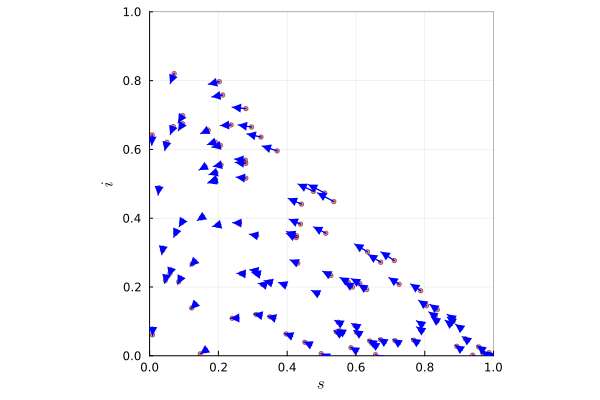

In [147]:


# as: arrow head size 0-1 (fraction of arrow length)
# la: arrow alpha transparency 0-1
function arrow0(x, y, u, v; as=0.07, lc=:black, la=1)           
    plot!([x,x+u],[y,y+v],lc=lc,la=1,arrow=(:closed, 2.0))     
end


F1(s,i) = -β*s*i 
F2(s,i) = β*s*i-γ*i  # points   # arrows 

N = 100;
x = 0 .+ rand(N) 
y = 0 .+ (1 .-x).*rand(N)  # points
u,v=F1.(x,y),F2.(x,y)

# plot points and arrows with 10% head sizes
scatter(x, y, mc=:red, ms=2.5, ratio=1, ma=0.5)

arrow0.(x, y, u, v; as=0.1, lc=:blue, la=1)
plot!(
xlims=(0,1),ylims=(0,1),
xlabel = L"s",
ylabel = L"i",
framestyle = :semi,
)



In [11]:
function SIR(x, p, t; β=0.2, γ=0.05 )
    s, i, r = x
    return [-β*s*i;      # ds/dt   
             β*s*i-γ*i;  # di/dt              
             γ*i;        # dr/dt = γi 
    ]
end

SIR (generic function with 1 method)

In [15]:
i_0 = 1E-4
s_0 = 1.0- i_0 
r_0 = 0.0
x_0 = [s_0, i_0, r_0]

tspan = (0.0, 350.0)  # ≈ 350 days
prob = ODEProblem(SIR, x_0, tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 350.0)
u0: 3-element Vector{Float64}:
 0.9999
 0.0001
 0.0

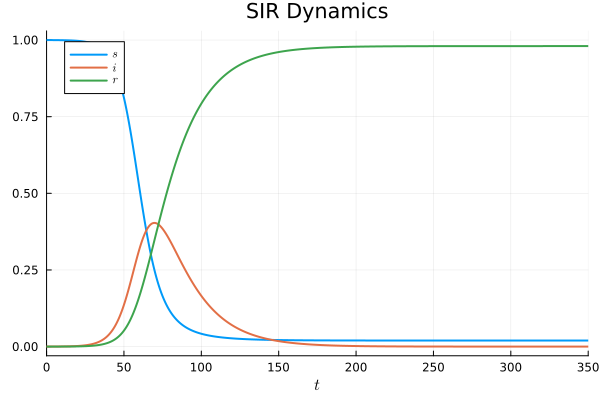

In [16]:
sol = solve(prob, Tsit5())
plot(sol, labels = [ L"s" L"i" L"r"], title = "SIR Dynamics", lw = 2, xlabel = L"t")


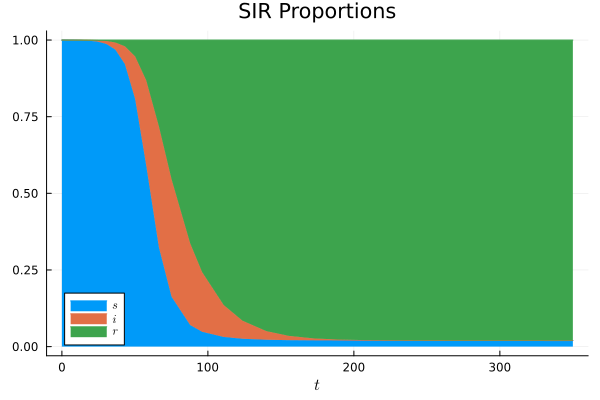

In [17]:
areaplot(sol.t, sol', labels = [L"s"  L"i" L"r"], title = "SIR Proportions", xlabel = L"t")

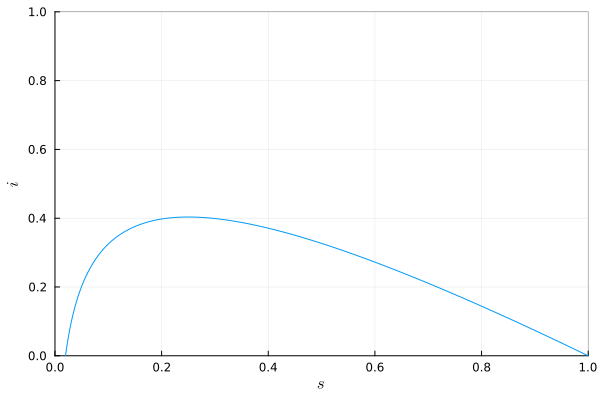

In [164]:
plot(sol,vars=(1,2),
    xlims=(0,1),ylims=(0,1),
    xlabel = L"s",
    ylabel = L"i",
    framestyle = :semi,
)
